# Preliminaries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)
I2 = np.eye(2, dtype = complex)
tau_0 = np.eye(2)
tau_x = np.array([[0, 1], [1, 0]], dtype=complex)
tau_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
tau_z = np.array([[1, 0], [0, -1]], dtype=complex)

In [3]:
#parameters
L = 80
tp, mp = 0.05, 0.1
g1, g2 = -0.5, 0.5

# MCI Constant
hp_constant = mp*(np.kron(tau_z,sigma_z)+ np.kron(tau_z,I2)+np.kron(tau_0,sigma_z)+np.kron(tau_x,sigma_z)+np.kron(tau_y,I2))
#hp = tp*np.cos(kx)*np.kron(tau_y,sigma_y)


#Weyl nodes at P1 = +/- 2.05, P2 = +/- 1.1

# Open in X

* Without MCI constant vs $k_z$, $k_y = 0$ 

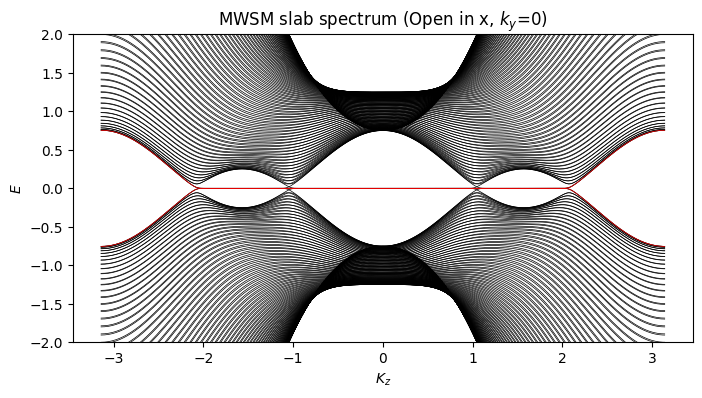

In [4]:
kzs = np.linspace(-np.pi,np.pi, 301)
ky = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum (Open in x, $k_y$=0)')
ax.set_ylim (-2,2)
plt.savefig('MWSM slab spectrum (Open in x, $k_y$=0)')

plt.show()

* Without MCI constant vs $k_y$, when $k_z$ $= 0$ and $\pi/2$

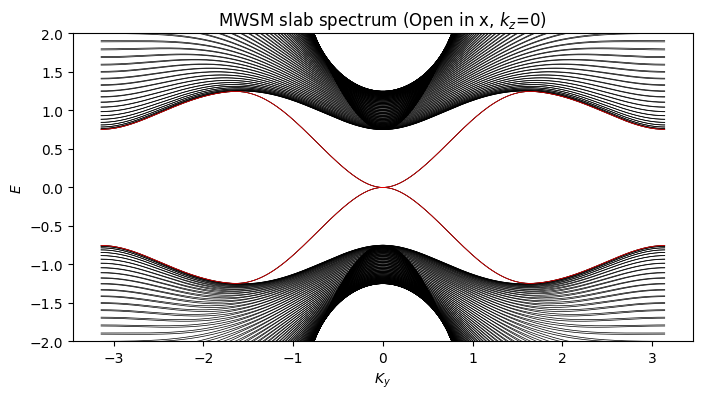

In [5]:
kys = np.linspace(-np.pi,np.pi, 301)
kz = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum (Open in x, $k_z$=0)')
ax.set_ylim (-2,2)
plt.savefig('MWSM slab spectrum (Open in x, $k_z$=0)')

plt.show()

<>:52: SyntaxWarning: invalid escape sequence '\p'
<>:52: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maza\AppData\Local\Temp\ipykernel_15800\3054652922.py:52: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title ('MWSM slab spectrum (Open in x, $k_z$=$\pi/2$)')


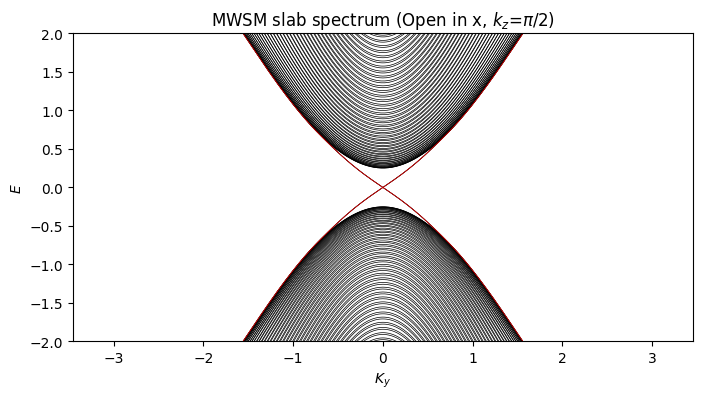

In [6]:
kys = np.linspace(-np.pi,np.pi, 301)
kz = np.pi/2

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum (Open in x, $k_z$=$\pi/2$)')
ax.set_ylim (-2,2)
plt.savefig('MWSM slab spectrum (Open in x, $k_z$=05pi)')

plt.show()

============================

* With MCI constant vs $k_z$

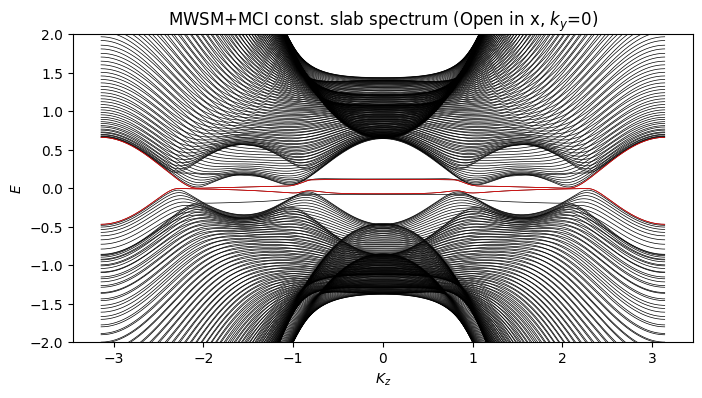

In [7]:
kzs = np.linspace(-np.pi,np.pi, 301)
ky = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger +hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM+MCI const. slab spectrum (Open in x, $k_y$=0)')
ax.set_ylim (-2,2)
plt.savefig('MWSM+MCI constant slab spectrum (Open in x, $k_y$=0)')

plt.show()

* With MCI constant vs $k_y$, when $k_z$ $= 0$ and $\pi/2$

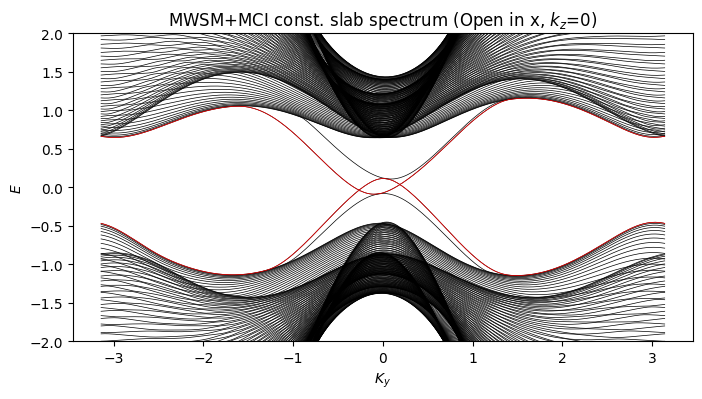

In [8]:
kys = np.linspace(-np.pi,np.pi, 301)
kz = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger +hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM+MCI const. slab spectrum (Open in x, $k_z$=0)')
ax.set_ylim (-2,2)
plt.savefig('MWSM+MCI constant slab spectrum (Open in x, $k_z$=0)')

plt.show()

<>:52: SyntaxWarning: invalid escape sequence '\p'
<>:52: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maza\AppData\Local\Temp\ipykernel_15800\3585564587.py:52: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title ('MWSM+MCI const. slab spectrum (Open in x, $k_z$=$\pi/2$)')


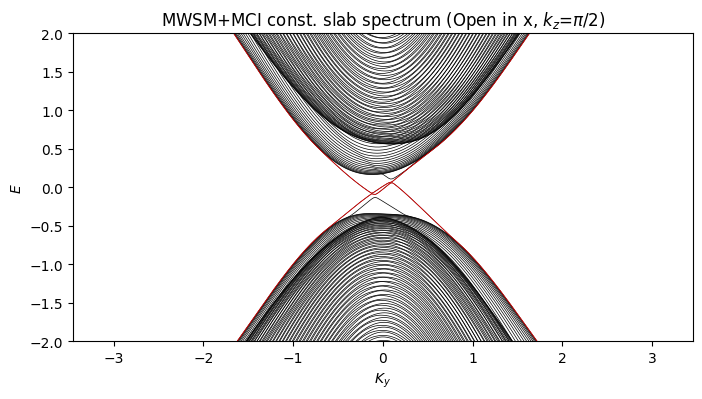

In [9]:
kys = np.linspace(-np.pi,np.pi, 301)
kz = np.pi/2

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for ky in kys:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(ky)*tau_y+(2+g1-np.cos(ky)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_x+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = np.sin(ky)*sigma_y-(2+g2-np.cos(ky)-np.cos(kz))*sigma_z
    VP_2 = (1j/2)*sigma_x-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kys, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kys,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_y$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM+MCI const. slab spectrum (Open in x, $k_z$=$\pi/2$)')
ax.set_ylim (-2,2)
plt.savefig('MWSM+MCI constant slab spectrum (Open in x, $k_z$=05pi)')

plt.show()

# Open in y

* Without MCI constant vs $k_z$, $k_x = 0$

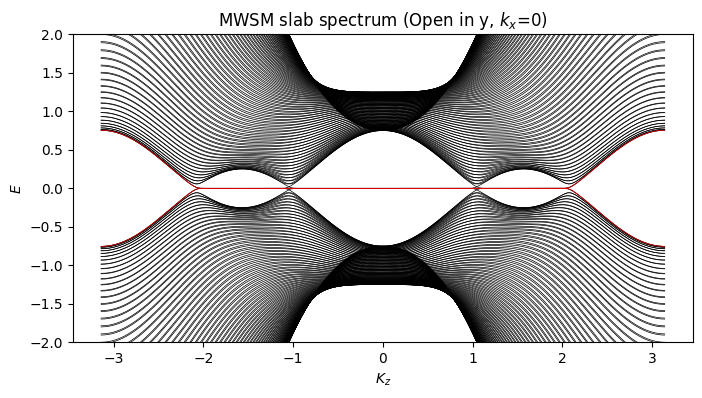

In [10]:
kzs = np.linspace(-np.pi,np.pi, 301)
kx = 0

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz))*sigma_z
    VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum (Open in y, $k_x$=0)')
ax.set_ylim (-2,2)
plt.savefig('MWSM slab spectrum (Open in y, $k_x$=0)')

plt.show()

* Without MCI constant vs $k_x$, when $k_z$ $= 0$ and $\pi/2$

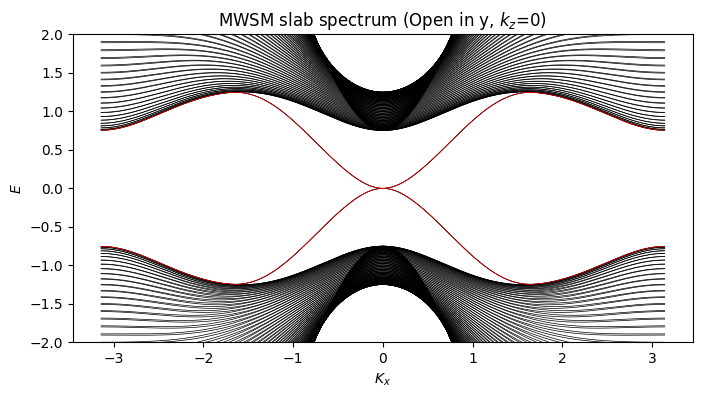

In [11]:
kxs = np.linspace(-np.pi,np.pi, 301)
kz = 0


#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz))*sigma_z
    VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kxs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kxs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum (Open in y, $k_z$=0)')
ax.set_ylim (-2,2)
plt.savefig('MWSM slab spectrum (Open in y, $k_z$=0)')

plt.show()

<>:53: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maza\AppData\Local\Temp\ipykernel_15800\858640571.py:53: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title ('MWSM slab spectrum (Open in y, $k_z=\pi/2$)')


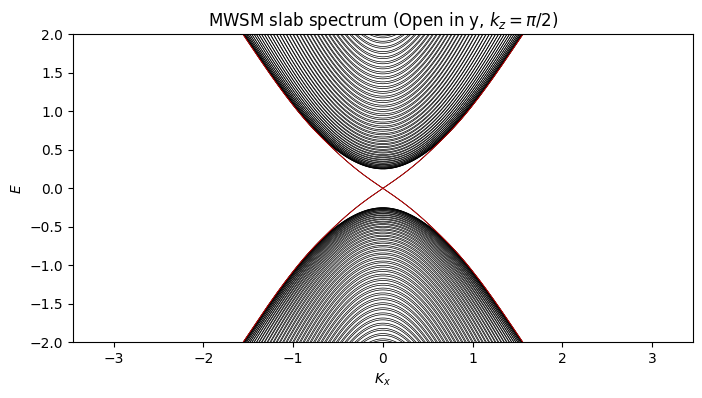

In [12]:
kxs = np.linspace(-np.pi,np.pi, 301)
kz = np.pi/2


#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz))*sigma_z
    VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kxs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kxs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM slab spectrum (Open in y, $k_z=\pi/2$)')
ax.set_ylim (-2,2)
plt.savefig('MWSM slab spectrum (Open in y, $k_z=05pi)')

plt.show()

* With MCI constant vs $k_z$, $k_x = 0$

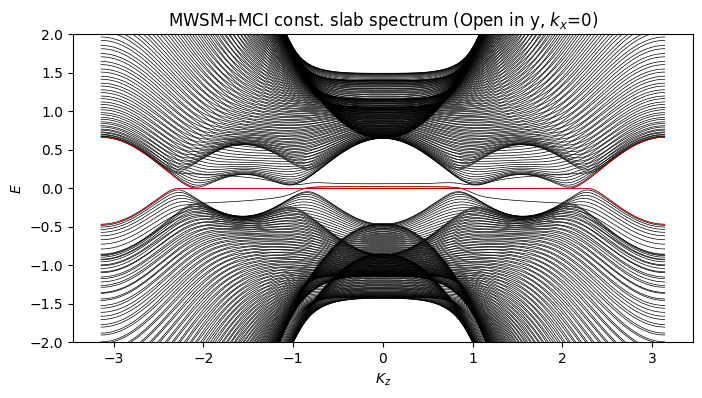

In [13]:
#Slab spectra - OBC in x direction
#Parameters

L = 80
kzs = np.linspace(-np.pi,np.pi, 301)
kx = 0

g1, g2 = -0.5, 0.5

#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kz in kzs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz))*sigma_z
    VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kzs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kzs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_z$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM+MCI const. slab spectrum (Open in y, $k_x$=0)')
ax.set_ylim (-2,2)
plt.savefig('MWSM+MCI constant slab spectrum (Open in y, $k_x$=0)')

plt.show()

* Without MCI constant vs $k_x$, when $k_z$ $= 0$ and $\pi/2$

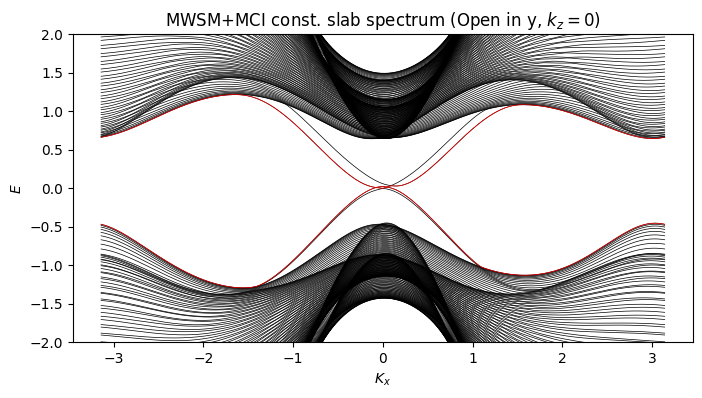

In [14]:
kxs = np.linspace(-np.pi,np.pi, 301)
kz = 0


#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz))*sigma_z
    VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kxs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kxs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM+MCI const. slab spectrum (Open in y, $k_z=0$)')
ax.set_ylim (-2,2)
plt.savefig('MWSM+MCI constant slab spectrum (Open in y, $k_z=0$)')

plt.show()

In [ ]:
kxs = np.linspace(-np.pi,np.pi, 301)
kz = np.pi/2


#Hamiltonian and diagonalization
child_eigvals_oc_vs_kz = []
for kx in kxs:

    #H1 = H_P1 + VP_1 *exp(ikx) + VP_1d *exp(iky)
    HP_1 = np.sin(kx)*tau_x+(2+g1-np.cos(kx)-np.cos(kz))*tau_z
    VP_1 = (-1j/2)*tau_y+(1/2)*tau_z
    VP_1d = VP_1.conj().T

    #H2 = H_P2 + VP_2 *exp(ikx) + VP_2d *exp(iky)
    HP_2 = -np.sin(kx)*sigma_x-(2+g2-np.cos(kx)-np.cos(kz))*sigma_z
    VP_2 = (-1j/2)*sigma_y-(1/2)*sigma_z
    VP_2d = VP_2.conj().T

    #H_c = H1⊗ H2
    h_onsite = np.kron (HP_1, HP_2)
    v_hops = np.kron (VP_1, VP_2)
    v_dagger = np.kron (VP_1, VP_2d)+np.kron (VP_1d, VP_2)
    nearest = np.kron (HP_1, VP_2)+ np.kron(VP_1, HP_2)
    
    H_child = np.zeros((4*L, 4*L), dtype=complex)
    for i in range(L):
        H_child[4*i:4*(i+1), 4*i:4*(i+1)] = h_onsite + v_dagger + hp_constant
        if i < L - 1:
            H_child[4*i:4*(i+1), 4*(i+1):4*(i+2)] = nearest
            H_child[4*(i+1):4*(i+2), 4*i:4*(i+1)] = nearest.conj().T
        if i < L - 2:
            H_child[4*i:4*(i+1), 4*(i+2):4*(i+3)] = v_hops
            H_child[4*(i+2):4*(i+3), 4*i:4*(i+1)] = v_hops.conj().T


    eigenvals_oc_child = np.linalg.eigvalsh(H_child)
    child_eigvals_oc_vs_kz.append(eigenvals_oc_child)


child_eigvals_oc_vs_kz = np.array(child_eigvals_oc_vs_kz).T

#plot
fig, ax = plt.subplots(figsize=(8,4))
for band in child_eigvals_oc_vs_kz:
    ax.plot(kxs, band, color='black', linewidth=0.5)

mid = 2*L
for b in [mid-1, mid]:
    plt.plot(kxs,child_eigvals_oc_vs_kz[b], color='red', linewidth =0.5)

ax.set_xlabel ('$K_x$')
ax.set_ylabel ('$E$')
ax.set_title ('MWSM+MCI const. slab spectrum (Open in y, $k_z=\pi/2$)')
ax.set_ylim (-2,2)
plt.savefig('MWSM+MCI constant slab spectrum (Open in y, $k_z=05pi$)')

plt.show()

<>:53: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\p'
C:\Users\maza\AppData\Local\Temp\ipykernel_15800\3715033200.py:53: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title ('MWSM+MCI const. slab spectrum (Open in y, $k_z=\pi/2$)')
